In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score,cross_val_predict,KFold
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import LocalOutlierFactor

# 1 Data Preprocess

**1.1 Read Datasets**

In [2]:
# read datasets
data_train = pd.read_csv('./steam_train.txt',sep = '\t')
data_test = pd.read_csv('./steam_test.txt',sep = '\t')

In [3]:
data_train["oringin"]="train"
data_test["oringin"]="test"
data_all=pd.concat([data_train,data_test],axis=0,ignore_index=True)
# show the first 5 data
data_all.head()

V0     V1    V10    V11    V12    V13    V14    V15    V16    V17  ...  \
0  0.566  0.016 -0.940 -0.307 -0.073  0.550 -0.484  0.000 -1.707 -1.162  ...   
1  0.968  0.437  0.188 -0.455 -0.134  1.109 -0.488  0.000 -0.977 -1.162  ...   
2  1.013  0.568  0.874 -0.051 -0.072  0.767 -0.493 -0.212 -0.618 -0.897  ...   
3  0.733  0.368  0.011  0.102 -0.014  0.769 -0.371 -0.162 -0.429 -0.897  ...   
4  0.684  0.638 -0.251  0.570  0.199 -0.349 -0.342 -0.138 -0.391 -0.897  ...   

     V36    V37     V4     V5     V6     V7     V8     V9  oringin  target  
0 -2.608 -3.508  0.452 -0.901 -1.812 -2.360 -0.436 -2.114    train   0.175  
1 -0.335 -0.730  0.194 -0.893 -1.566 -2.360  0.332 -2.114    train   0.676  
2  0.765 -0.589  0.112 -0.797 -1.367 -2.360  0.396 -2.114    train   0.633  
3  0.333 -0.112  0.599 -0.679 -1.200 -2.086  0.403 -2.114    train   0.206  
4 -0.280 -0.028  0.337 -0.454 -1.073 -2.086  0.314 -2.114    train   0.384  

[5 rows x 40 columns]

In [4]:
data_test.head()

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904  ...   
1  0.148  0.489 -0.247 -0.049  0.122 -0.201  0.487  0.493 -0.127  0.904  ...   
2 -0.166 -0.062 -0.311  0.046 -0.055  0.063  0.485  0.493 -0.227  0.904  ...   
3  0.102  0.294 -0.259  0.051 -0.183  0.148  0.474  0.504  0.010  0.904  ...   
4  0.300  0.428  0.208  0.051 -0.033  0.116  0.408  0.497  0.155  0.904  ...   

     V29    V30    V31    V32    V33    V34    V35    V36    V37  oringin  
0  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388     test  
1  0.047  0.560  0.176  0.551  0.046 -0.220  0.008 -0.294  0.104     test  
2 -0.398  0.101  0.199  0.634  0.017 -0.234  0.008  0.373  0.569     test  
3 -0.398  1.007  0.137  1.042 -0.040 -0.290  0.008 -0.666  0.391     test  
4 -0.776  0.291  0.370  0.181 -0.040 -0.290  0.008 -0.140 -0.497     test  

[5 rows x 39 columns]

**1.2 Data Distribution**

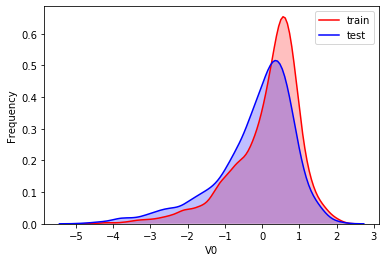

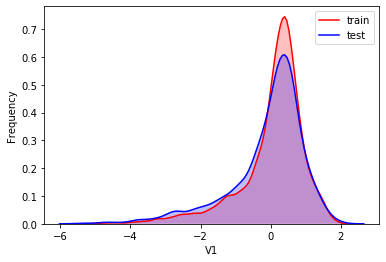

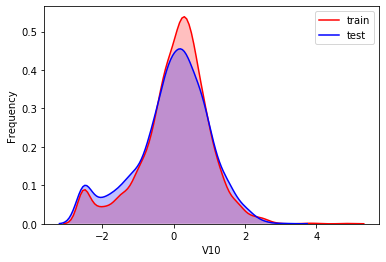

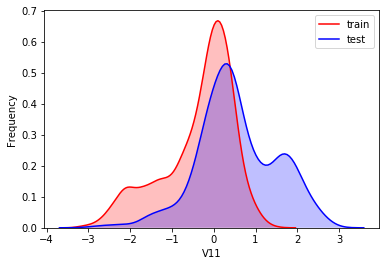

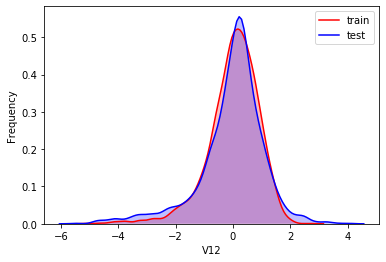

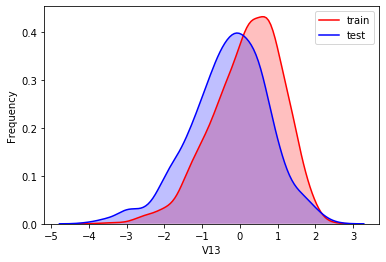

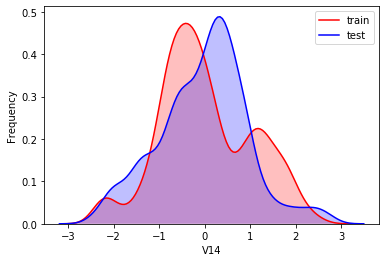

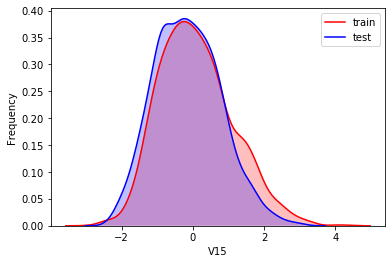

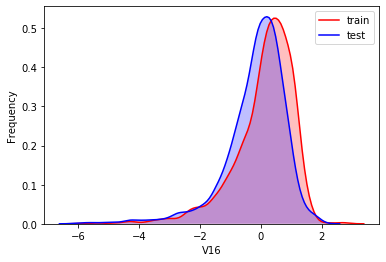

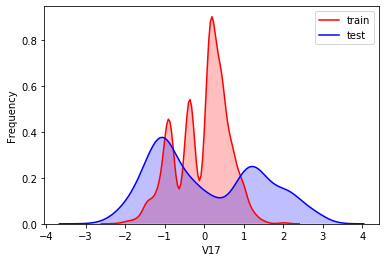

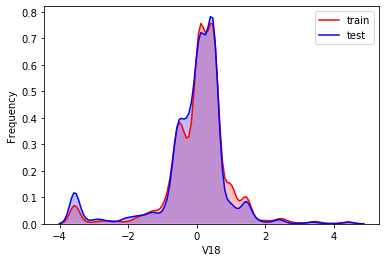

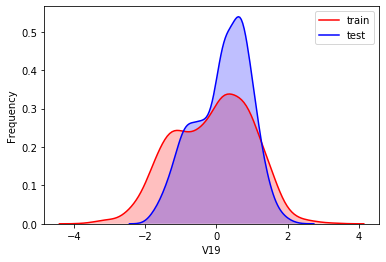

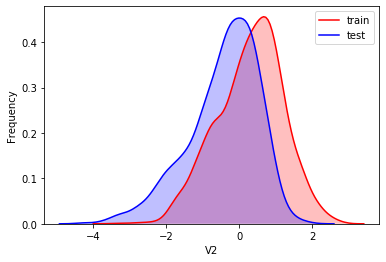

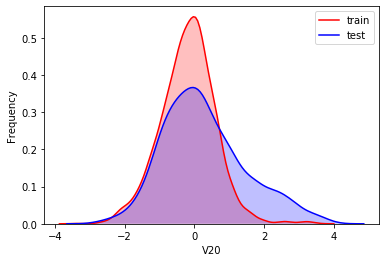

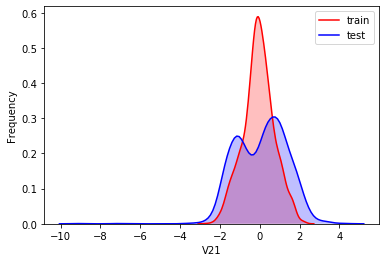

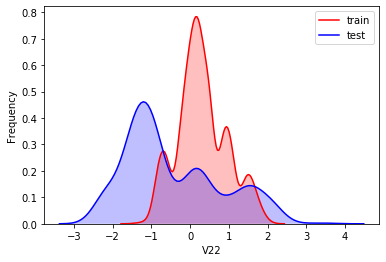

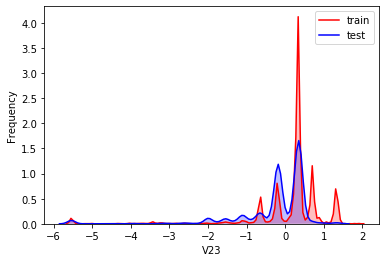

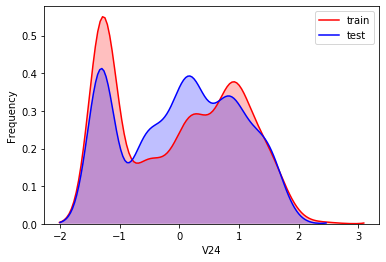

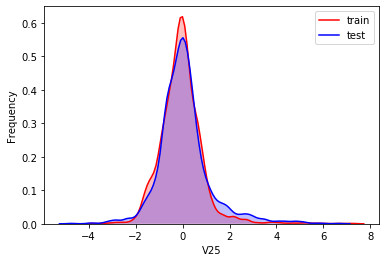

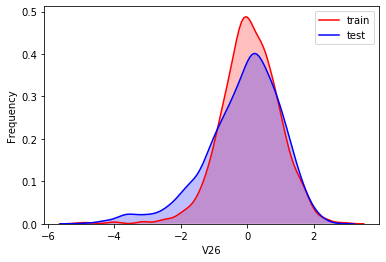

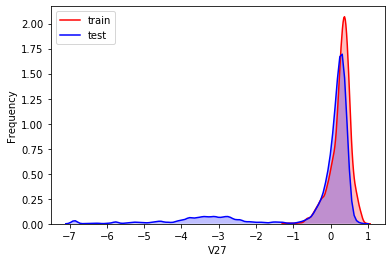

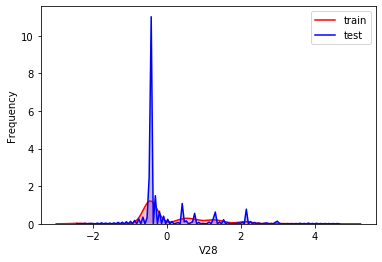

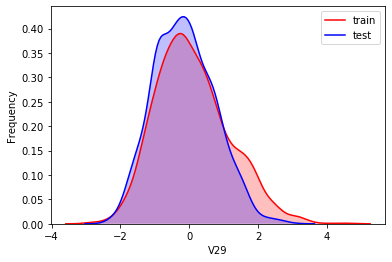

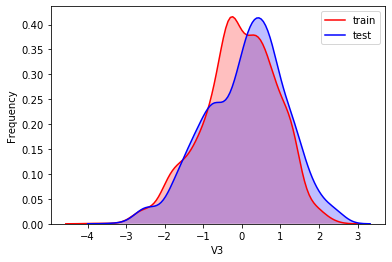

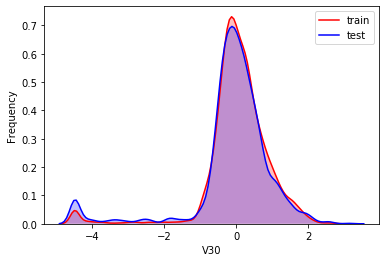

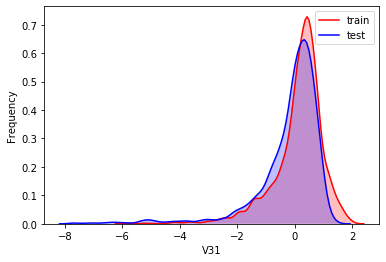

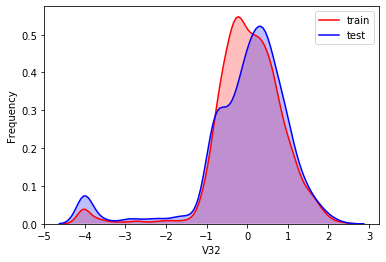

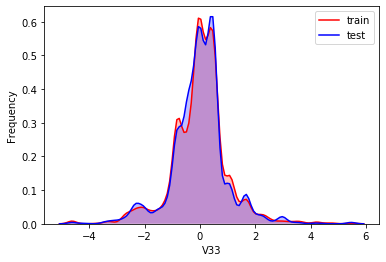

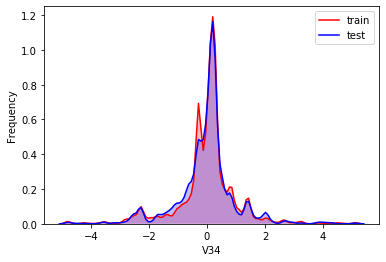

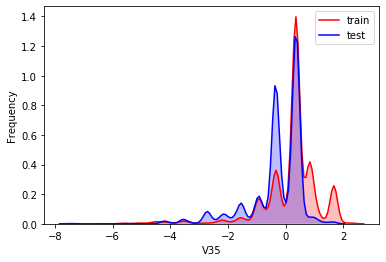

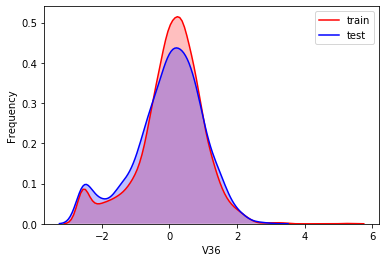

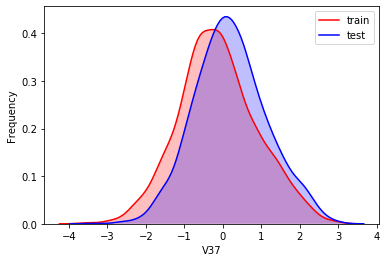

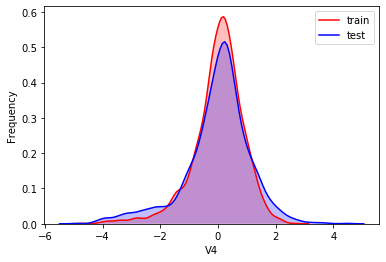

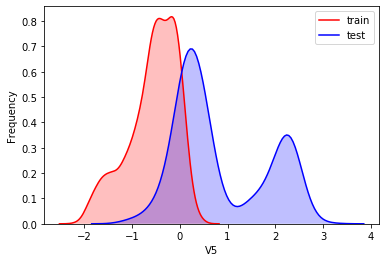

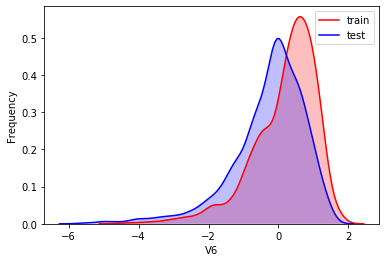

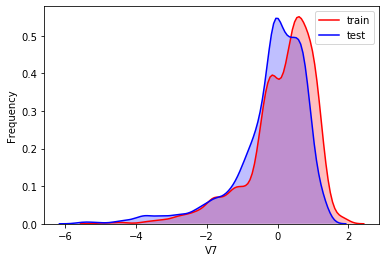

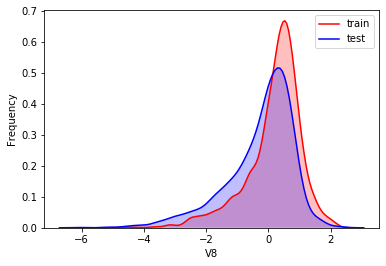

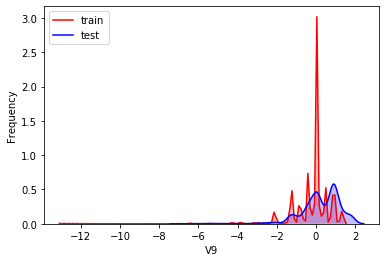

In [5]:
# find out the data distribution of 'V0'...'V37'
for column in data_all.columns[0:-2]:
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color="Red", shade = True)
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

**1.3 Data Cleaning**

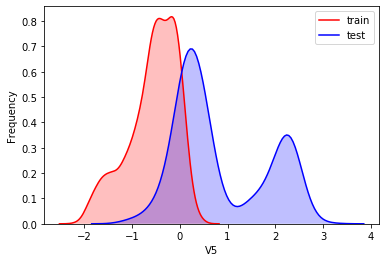

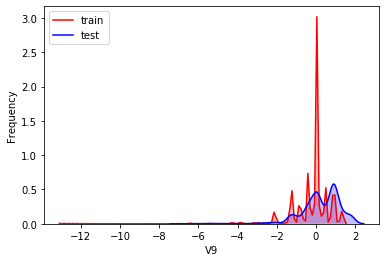

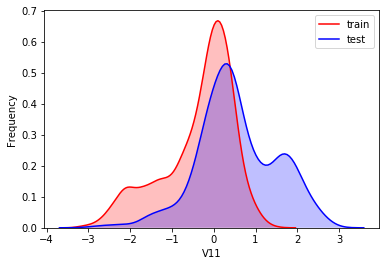

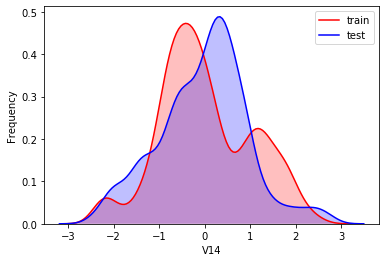

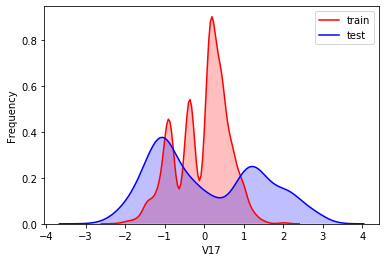

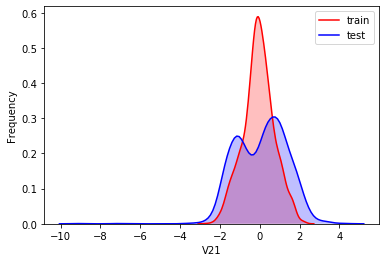

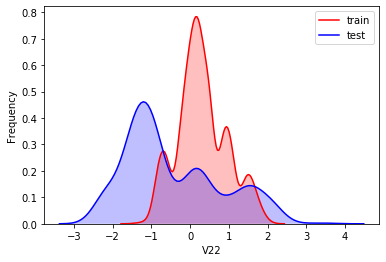

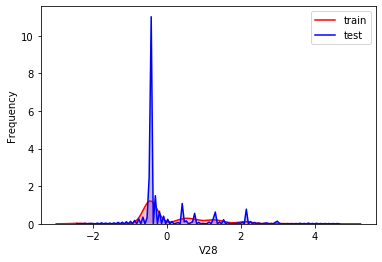

In [6]:
# Dropout feature "V5","V9","V11","V14","V17","V21","V22","V28" for their uneven distribution on Train/Test sets.
for column in ["V5","V9","V11","V14","V17","V21","V22","V28"]:
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color="Red", shade = True)
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

data_all.drop(["V5","V9","V11","V14","V17","V21","V22","V28"],axis=1,inplace=True)

**1.4 Data visualization**

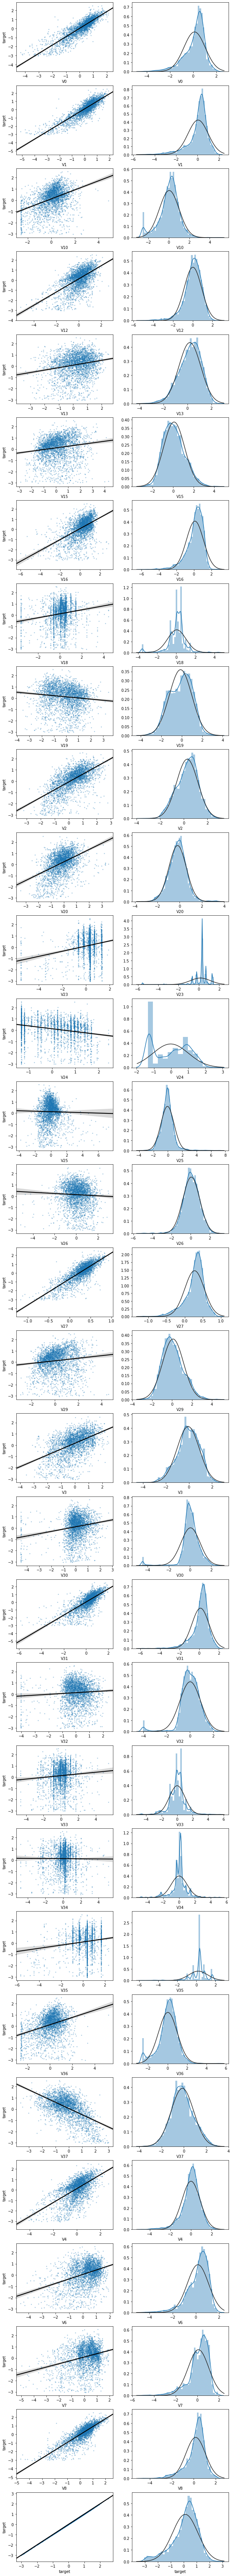

In [7]:
data_train1=data_all[data_all["oringin"]=="train"].drop("oringin",axis=1)

fcols = 2
frows = len(data_train.columns)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in data_train1.columns:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='target', data=data_train, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(data_train[col].dropna() , fit=stats.norm)
    plt.xlabel(col)

**1.5 Correlation coefficient**

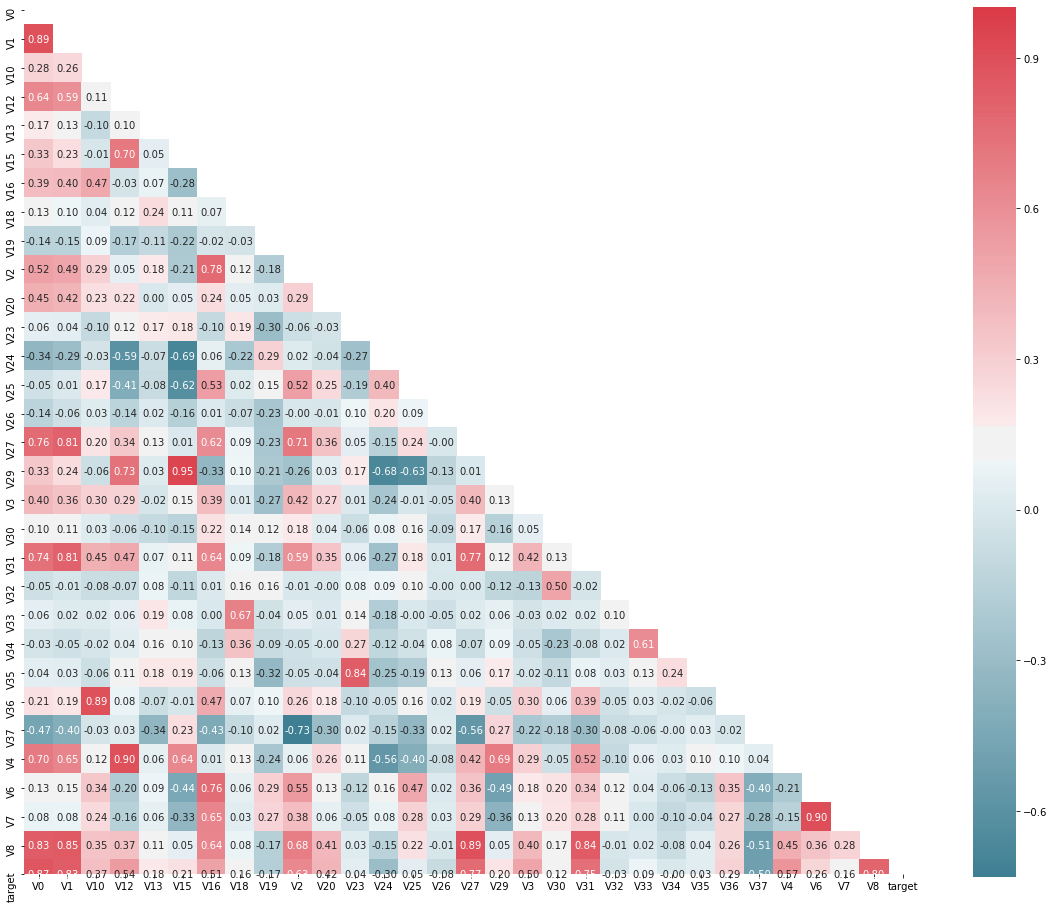

In [8]:
# Find out the correlation coefficient
plt.figure(figsize=(20, 16))
colnm = data_train1.columns.tolist()
mcorr = data_train1[colnm].corr(method="spearman")
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
plt.show()

In [9]:
threshold = 0.1
# Absolute value correlation matrix
corr_matrix = data_train1.corr().abs()
drop_col=corr_matrix[corr_matrix["target"]<threshold].index
data_all.drop(drop_col,axis=1,inplace=True)

**1.6 Normalize**

In [10]:
# normalise numeric columns
cols_numeric=list(data_all.columns)
cols_numeric.remove("oringin")
def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())
scale_cols = [col for col in cols_numeric if col!='target']
data_all[scale_cols] = data_all[scale_cols].apply(scale_minmax,axis=0)
data_all[scale_cols].describe()

V0           V1          V10          V12          V13  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.694172     0.721357     0.348518     0.578507     0.612372   
std       0.144198     0.131443     0.134882     0.105088     0.149835   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626676     0.679416     0.284327     0.532892     0.519928   
50%       0.729488     0.752497     0.366469     0.591635     0.627809   
75%       0.790195     0.799553     0.432965     0.641971     0.719958   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V15          V16          V18          V19           V2  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.402251     0.679294     0.446542     0.519158     0.602300  ...   
std       0.138561     0.112095     0.124627     0.140166     0.140628  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.299016     0.629414     0.399302     0.414436     0.514414  ...   
50%       0.391437     0.700258     0.456256     0.540294     0.617072  ...   
75%       0.489954     0.753279     0.501745     0.623125     0.700464  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

                V3          V30          V31          V35          V36  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.603139     0.589459     0.792709     0.762873     0.332385   
std       0.152462     0.130786     0.102976     0.102037     0.127456   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.503888     0.550092     0.761816     0.727273     0.270584   
50%       0.614270     0.594428     0.815055     0.800020     0.347056   
75%       0.710474     0.650798     0.852229     0.800020     0.414861   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V37           V4           V6           V7           V8  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.545795     0.523743     0.748823     0.745740     0.715607  
std       0.150356     0.106430     0.132560     0.132577     0.118105  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.445647     0.478182     0.683324     0.696938     0.664934  
50%       0.539317     0.535866     0.774125     0.771974     0.742884  
75%       0.643061     0.585036     0.842259     0.836405     0.790835  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 25 columns]

**1.7 Box-Cox transformation**

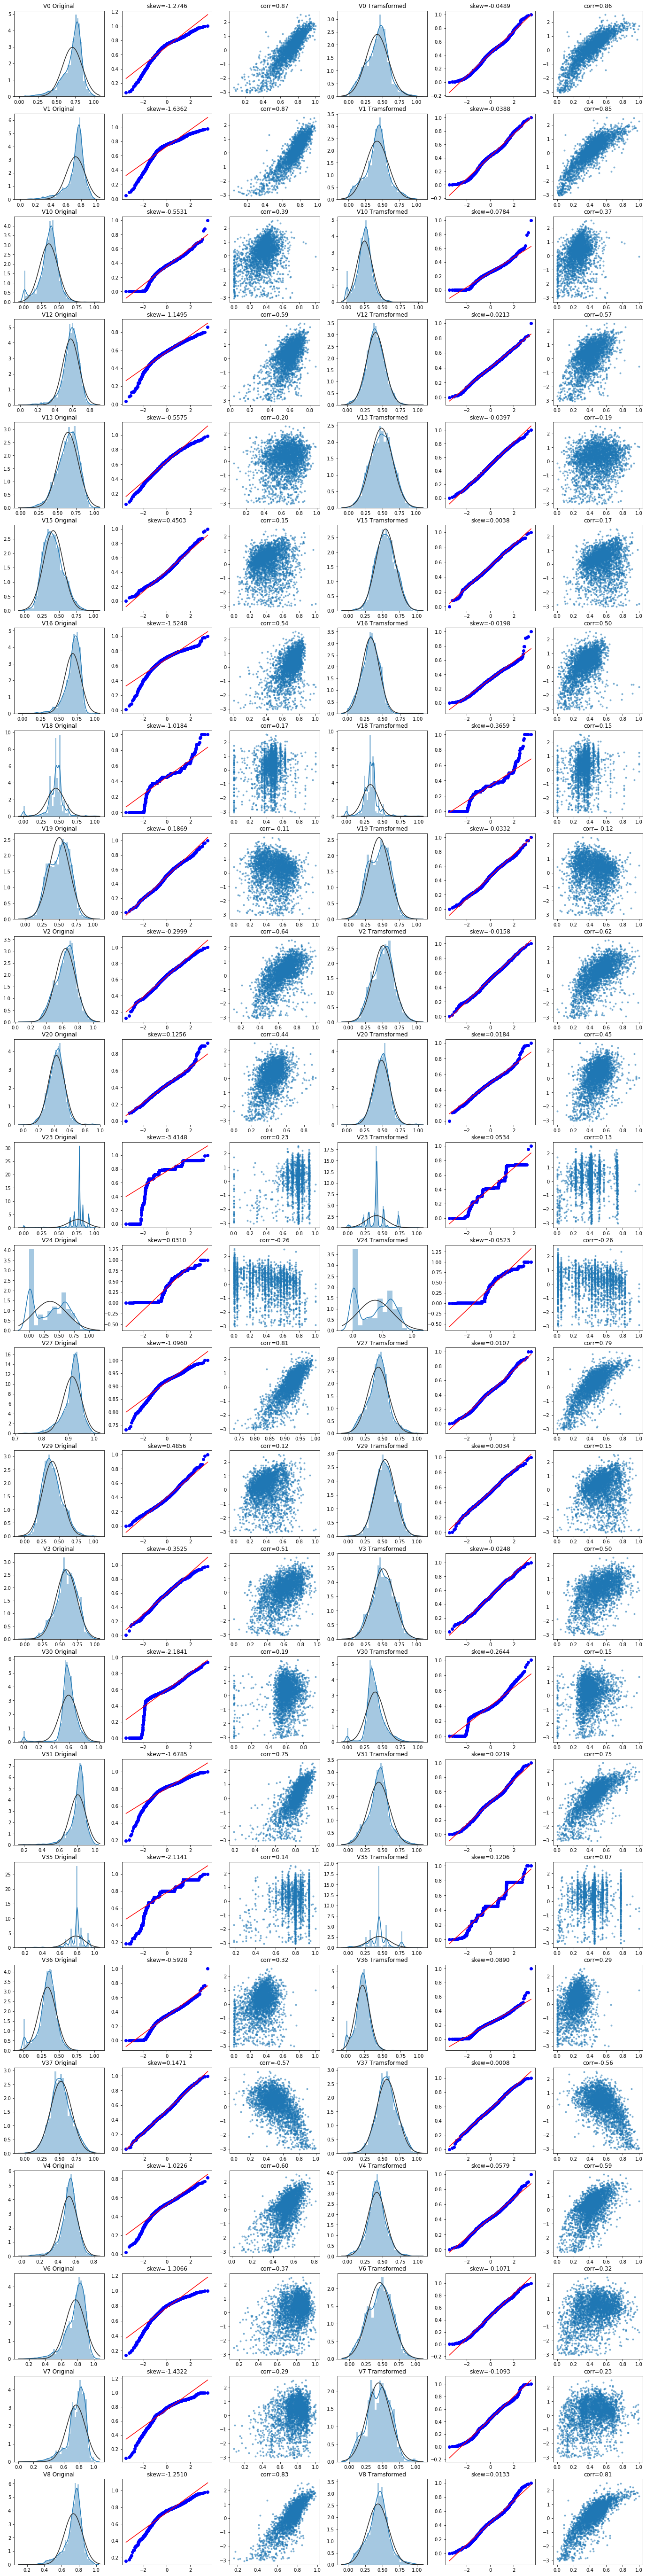

In [11]:
# Plot the influence of Box-Cox transformation on the distribution of the data
fcols = 6
frows = len(cols_numeric)-1
plt.figure(figsize=(4*fcols,4*frows))
i=0

for var in cols_numeric:
    if var!='target':
        dat = data_all[[var, 'target']].dropna()
        
        i+=1
        plt.subplot(frows,fcols,i)
        sns.distplot(dat[var] , fit=stats.norm);
        plt.title(var+' Original')
        plt.xlabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        _=stats.probplot(dat[var], plot=plt)
        plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
        plt.xlabel('')
        plt.ylabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        plt.plot(dat[var], dat['target'],'.',alpha=0.5)
        plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
 
        i+=1
        plt.subplot(frows,fcols,i)
        trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
        trans_var = scale_minmax(trans_var)      
        sns.distplot(trans_var , fit=stats.norm);
        plt.title(var+' Tramsformed')
        plt.xlabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        _=stats.probplot(trans_var, plot=plt)
        plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
        plt.xlabel('')
        plt.ylabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        plt.plot(trans_var, dat['target'],'.',alpha=0.5)
        plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

In [12]:
# Do the Box-Cox transformation
cols_transform=data_all.columns[0:-2]
for col in cols_transform:   
    # transform column
    data_all.loc[:,col], _ = stats.boxcox(data_all.loc[:,col]+1)

**1.8 features of the target**

count    2888.000000
mean        0.126353
std         0.983966
min        -3.044000
25%        -0.350250
50%         0.313000
75%         0.793250
max         2.538000
Name: target, dtype: float64


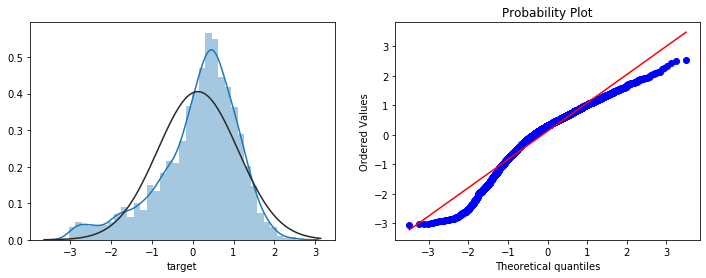

In [13]:
print(data_all.target.describe())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data_all.target.dropna() , fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(data_all.target.dropna(), plot=plt)

count    2888.000000
mean        1.129957
std         0.394110
min         0.291057
25%         0.867609
50%         1.135315
75%         1.379382
max         2.798463
Name: target, dtype: float64


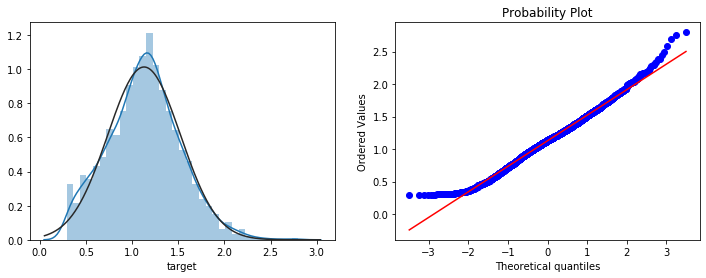

In [14]:
# Do logarithm transformation on target to improve normality
sp = data_train.target
data_train.target1 =np.power(1.5,sp)
print(data_train.target1.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data_train.target1.dropna(),fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(data_train.target1.dropna(), plot=plt)

In [15]:
# function to get training samples
def get_training_data():
    # extract training samples
    from sklearn.model_selection import train_test_split
    df_train = data_all[data_all["oringin"]=="train"]
    df_train["label"]=data_train.target1
    # split SalePrice and features
    y = df_train.target
    X = df_train.drop(["oringin","target","label"],axis=1)
    X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=100)
    return X_train,X_valid,y_train,y_valid

# extract test data (without SalePrice)
def get_test_data():
    df_test = data_all[data_all["oringin"]=="test"].reset_index(drop=True)
    return df_test.drop(["oringin","target"],axis=1)

In [16]:
from sklearn.metrics import make_scorer
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)
def mse(y_ture,y_pred):
    return mean_squared_error(y_ture,y_pred)

# scorer to be used in sklearn model fitting
rmse_scorer = make_scorer(rmse, greater_is_better=False)
mse_scorer = make_scorer(mse, greater_is_better=False)

In [17]:
# function to detect outliers based on the predictions of a model
def find_outliers(model, X, y, sigma=3):

    # predict y values using model
    model.fit(X,y)
    y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid    
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print("mse=",mean_squared_error(y,y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers

R2= 0.8766692300840107
rmse= 0.34900867702002525
mse= 0.12180705663526849
---------------------------------------
mean of residuals: -4.955077527025686e-16
std of residuals: 0.3490950546174426
---------------------------------------
22 outliers:
[2655, 2159, 1164, 2863, 1145, 2697, 2528, 2645, 691, 1085, 1874, 2647, 884, 2696, 2668, 1310, 1901, 1458, 2769, 2002, 2669, 1972]


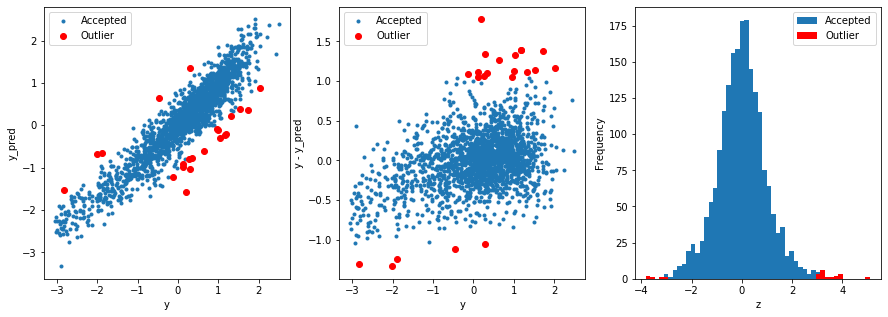

In [18]:
# get training data
from sklearn.linear_model import Ridge
X_train, X_valid,y_train,y_valid = get_training_data()
test=get_test_data()

# find and remove outliers using a Ridge model
outliers = find_outliers(Ridge(), X_train, y_train)
X_outliers=X_train.loc[outliers]
y_outliers=y_train.loc[outliers]
X_t=X_train.drop(outliers)
y_t=y_train.drop(outliers)

**1.9 Elinminate abnormal data with OneClassSVM**

In [19]:
scaler = MinMaxScaler().fit(data_train1.loc[:, data_train1.columns != "target"]) 
data_train1.loc[:, data_train1.columns != "target"] = scaler.transform(data_train1.loc[:, data_train1.columns != "target"])
pd.DataFrame(data_all).describe()
# OneClassSVM
clf = LocalOutlierFactor(n_neighbors=35, contamination=0.1, novelty=True)
clf.fit(data_train1.loc[:, data_train1.columns != "target"])
labels = clf.predict(data_train1.loc[:, data_train1.columns != "target"])
score = clf.decision_function(data_train1.loc[:, data_train1.columns != "target"])
data_train1.loc[:, data_train1.columns != "target"] = data_train1.loc[:, data_train1.columns != "target"][labels>0]
data_train1.dropna(axis='index', how='all', subset=['V1'], inplace = True)
pd.DataFrame(data_train1).describe()

V0           V1          V10          V12          V13  \
count  2621.000000  2621.000000  2621.000000  2621.000000  2621.000000   
mean      0.696648     0.740511     0.351869     0.666992     0.637631   
std       0.133326     0.124869     0.123745     0.105434     0.142289   
min       0.016109     0.049006     0.000000     0.062132     0.112846   
25%       0.635223     0.701562     0.293634     0.610330     0.544390   
50%       0.729554     0.767898     0.368087     0.677193     0.650732   
75%       0.783922     0.812642     0.429053     0.738047     0.740813   
max       1.000000     0.989205     0.879282     1.000000     1.000000   

               V15          V16          V18          V19           V2  ...  \
count  2621.000000  2621.000000  2621.000000  2621.000000  2621.000000  ...   
mean      0.414999     0.690344     0.458070     0.503850     0.595809  ...   
std       0.137267     0.107449     0.101042     0.152306     0.143539  ...   
min       0.051545     0.072608     0.000748     0.041626     0.091549  ...   
25%       0.311348     0.644651     0.414434     0.382060     0.500480  ...   
50%       0.402106     0.711943     0.462047     0.520112     0.611396  ...   
75%       0.501039     0.763628     0.502804     0.621163     0.695423  ...   
max       0.868921     0.933612     0.963854     0.965662     1.000000  ...   

               V33          V34          V35          V36          V37  \
count  2621.000000  2621.000000  2621.000000  2621.000000  2621.000000   
mean      0.459140     0.484603     0.740559     0.336156     0.523087   
std       0.085535     0.085954     0.112446     0.117611     0.148620   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.414784     0.454490     0.711186     0.281290     0.425943   
50%       0.454518     0.499949     0.755580     0.349095     0.516139   
75%       0.500000     0.511365     0.792618     0.411547     0.614932   
max       0.892985     1.000000     1.000000     0.733750     1.000000   

                V4           V6           V7           V8       target  
count  2621.000000  2621.000000  2621.000000  2621.000000  2621.000000  
mean      0.642927     0.739816     0.745063     0.704442     0.155401  
std       0.110204     0.138614     0.133365     0.123490     0.946496  
min       0.071457     0.045743     0.012776     0.156984    -3.024000  
25%       0.590634     0.665739     0.684755     0.657633    -0.296000  
50%       0.653075     0.771596     0.776629     0.729278     0.330000  
75%       0.709999     0.837274     0.837640     0.780741     0.797000  
max       0.945633     0.985628     1.000000     1.000000     2.538000  

[8 rows x 31 columns]

# 2 Models

**2.1 split train and validation set**

In [20]:
trainset_label = data_train1[data_train1.loc[:, "target"].notna()]["target"]
trainset = data_train1[data_train1.loc[:, "target"].notna()].drop(["target"],axis=1)
x_test = data_train1[data_train1.loc[:, "target"].isna()].drop(["target"],axis=1)
x_train,x_val,y_train,y_val=train_test_split(trainset,trainset_label,test_size=0.2,random_state=0)

**2.2 Linear Regression**

In [21]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_val) 

print("Score:", lr.score(x_val, y_val))
print("MSE:", mse(lr_predict, y_val))

Score: 0.8926894125981535
MSE: 0.11053158993152491


**2.3 Gradient Boosting Regression**

In [22]:
gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.06, n_estimators=100)
gbr.fit(x_train, y_train)
gbr_predict = gbr.predict(x_val) 

print("Score:", gbr.score(x_val, y_val))
print("MSE:", mse(gbr_predict, y_val))

Score: 0.89147524182338
MSE: 0.1117822048935095


**2.4 Ridge**

In [23]:
ridge = Ridge()
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_val) 

print("Score:", ridge.score(x_val, y_val))
print("MSE:", mse(ridge_predict, y_val))

Score: 0.8911242195088429
MSE: 0.11214376338896286


**2.5 MLP Regression**

In [24]:
mlp = MLPRegressor(hidden_layer_sizes= 200, max_iter= 150, early_stopping=True)
mlp.fit(x_train, y_train)
mlp_predict = mlp.predict(x_val)

print("Score:", mlp.score(x_val, y_val))
print("MSE:", mse(mlp_predict, y_val))

Score: 0.8961703131049972
MSE: 0.10694620775507552
